In [ ]:
# periodic time series



#  time series modeling process

# 1. stationary test
#    trend model:
#         Aggregation – taking average for a time period like monthly/weekly averages
#         Smoothing – taking rolling averages
#         Polynomial Fitting – fit a regression model
#    seasonality model:
#         differencing
#         model fitting
# 2. stationalize time series
#       detrend
#       remove seasonality
# 3. model the stationary part of time series        

#    seasonal-ARIMA 

# 4. perform prediction 


# TO DO
# plain time series prediction
# periodic time series prediction

# https://dandelion.eu/datamine/open-big-data/


In [ ]:
# http://www.johnwittenauer.net/a-simple-time-series-analysis-of-the-sp-500-index/
 

In [ ]:
# TO DO: 

# Statistics programming 

# book:

# Probabilistic Programming and Bayesian Methods for Hackers 
# http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Prologue/Prologue.ipynb

In [ ]:
# Examples:

# stock prediction
# https://bitbucket.org/joexdobs/ml-classifier-gesture-recognition/wiki/stock-example/
# predict-future-stock-price-using-machine-learning.md

# statsmodels:
#  http://statsmodels.sourceforge.net/stable/index.html

# http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/

# http://nbviewer.jupyter.org/gist/ChadFulton/5127108f4c7025ed2648

# https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

# http://nbviewer.jupyter.org/github/jakevdp/SeattleBike/blob/master/SeattleCycling.ipynb


# book
# http://shelfjoy.com/shelfjoy/17-essential-machine-learning-books-suggested-by-michael-i-jordan-from-berkeley

In [ ]:
# baseline

#  GP
#  S-ARIMA
#  SVR

#  RF
#  GBT
#  xgboosted 


In [1]:
# data processing packages
import numpy as np   
import pandas as pd 
from pandas import *
from numpy import *

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *
 
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import itertools

import random

# machine leanring packages

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score


from utils_dataPrepro import *

In [ ]:
# datasets

# http://redd.csail.mit.edu/readme.txt
# uci: stock, house power load, 

In [3]:
def build_training_testing_data_4learning( dta_df, target_col, indep_col, \
                                para_uni_variate, para_train_test_split, para_win_size, \
                                para_train_range, para_test_range):
        
# univariate
    if para_uni_variate == True:
        
        x_all, y_all = instance_extraction( \
                       list(dta_df[target_col][ para_train_range[0]:para_train_range[1] ]), para_win_size )

# multiple independent and one target series
    else:
        dta_mat = dta_df[ indep_col ][ para_train_range[0]:para_train_range[1] ].as_matrix()
        x_all, y_all = instance_extraction_multiple_one( \
                        list(dta_df[ target_col ][ para_train_range[0]:para_train_range[1] ]),\
                                                 list(dta_mat),para_win_size )
# multivariate 
# x_all, y_all = instance_extraction( list(dta_df[['Open','High','Low','Volume']][:4000]), 100 )


# downsample the whole data
    total_idx = range(len(x_all))
    np.random.shuffle(total_idx)

    x_all = np.array(x_all)
    y_all = np.array(y_all)

    x_all = x_all[ total_idx[: int(1.0*len(total_idx))] ]
    y_all = y_all[ total_idx[: int(1.0*len(total_idx))] ]

# training and testing data

# by extracting from subsequent data
    if para_train_test_split == False:
        
        if para_uni_variate == False:
            
            dta_mat = dta_df[ indep_col ][ para_test_range[0]:para_test_range[1] ].as_matrix()

            x_test, y_test = instance_extraction_multiple_one(\
                             list(dta_df[ target_col ][ para_test_range[0]:para_test_range[1] ]),\
                                                           list(dta_mat),para_win_size )
        else:
            x_test, y_test = instance_extraction( \
                             list(dta_df[ target_col ][ para_test_range[0]:para_test_range[1] ]), para_win_size )
            
        x_train = np.array(x_all)
        y_train = np.array(y_all)
        x_test = np.array(x_test)
        y_test = np.array(y_test)
        
        return x_train, x_test, y_train, y_test

# by randomly split
    else:
#         x_train, x_test, y_train, y_test = 
        return train_test_split( x_all, y_all, test_size = 0.2, random_state = 20)



def build_training_testing_data_4statistics( dta_df, target_col, indep_col, \
                                para_uni_variate, \
                                para_train_range, para_test_range):
        
# univariate
    if para_uni_variate == True:
        
        x_train = dta_df[target_col][ para_train_range[0]:para_train_range[1] ].as_matrix()
        
        x_test  = dta_df[target_col][ para_test_range[0]:para_test_range[1] ].as_matrix()


# multiple independent and one target series
    else:
        
        indep_col.append(target_col)
        
        x_train = dta_df[ indep_col ][ para_train_range[0]:para_train_range[1] ].as_matrix()
        
        x_test  = dta_df[ indep_col ][ para_test_range[0]:para_test_range[1] ].as_matrix()
        
    return x_train, x_test

  

Shape of the dataset:  (16653, 7)
Shape of training and testing dataset:  (3800, 200, 3) (3800,) (1300, 200, 3) (1300,)


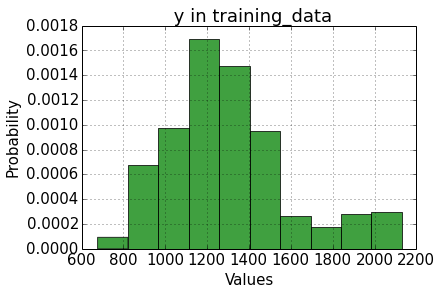

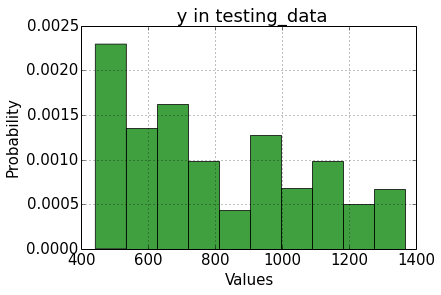

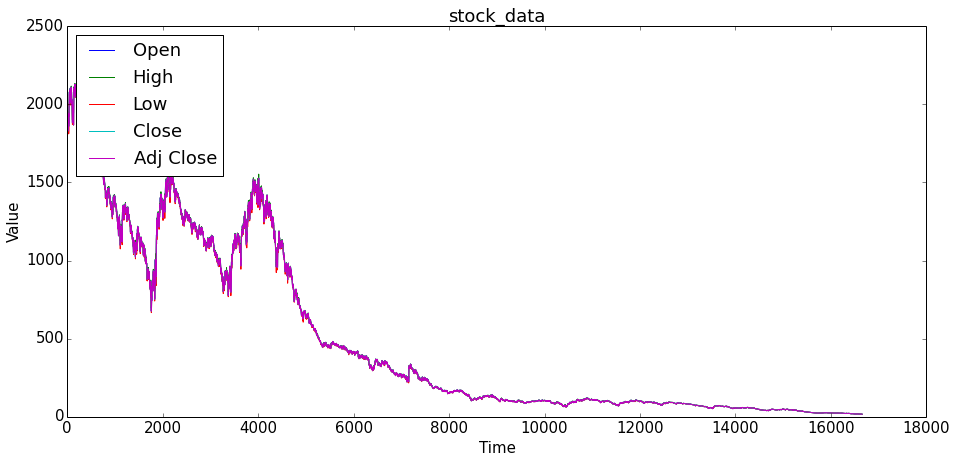

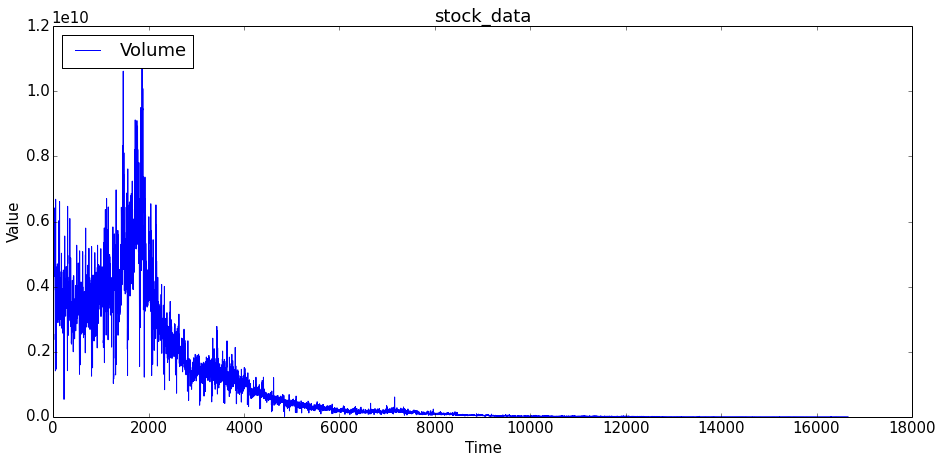

In [4]:
# stock dataset for machine learning 
# ([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype='object')

para_uni_variate = False
para_train_test_split = False
para_win_size = 200

para_train_range = (0,4000)
para_test_range  = (4000,5500)


addr = "../dataset/dataset_ts/stock.csv"
dta_df = pd.read_csv( addr ,sep=',')
print 'Shape of the dataset: ', dta_df.shape


x_train, x_test, y_train, y_test = build_training_testing_data_4learning( dta_df, 'Close', ['Open','Volume'], \
                        para_uni_variate, para_train_test_split, para_win_size, para_train_range, para_test_range)

print 'Shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train),\
    np.shape(x_test), np.shape(y_test)

# upsampling the training dataset if needed

# visualization
y_distribution_plot( y_train, ' y in training_data' )
y_distribution_plot( y_test,  ' y in testing_data' )

tmpdf = dta_df.drop(['Date', 'Volume'], axis=1)
multivariate_ts_plot( tmpdf, 'stock_data' )

multivariate_ts_plot( dta_df[ ['Volume'] ], 'stock_data' )


In [5]:
# stock dataset
# fix the training and testing datasets by materialization

x_train.dump("../dataset/dataset_ts/stock_xtrain.dat")
y_train.dump("../dataset/dataset_ts/stock_ytrain.dat")
x_test.dump("../dataset/dataset_ts/stock_xtest.dat")
y_test.dump("../dataset/dataset_ts/stock_ytest.dat")


# np.savetxt("../dataset/dataset_ts/stock_xtrain.csv", x_train, delimiter=",")
# np.savetxt("../dataset/dataset_ts/stock_xtest.csv",  x_test,  delimiter=",")
# np.savetxt("../dataset/dataset_ts/stock_ytrain.csv", y_train, delimiter=",")
# np.savetxt("../dataset/dataset_ts/stock_ytest.csv",  y_test,  delimiter=",")

In [10]:
# stock dataset for statistics

para_uni_variate = True

para_train_range = (0,4000)
para_test_range  = (4000,5500)


addr = "../dataset/dataset_ts/stock.csv"
dta_df = pd.read_csv( addr ,sep=',')
print 'Shape of the dataset: ', dta_df.shape

x_train, x_test = build_training_testing_data_4statistics( dta_df, 'Close', ['Open','Volume'], \
                        para_uni_variate, para_train_range, para_test_range)

print 'Shape of training and testing dataset: ', np.shape(x_train), np.shape(x_test)

x_train.dump("../dataset/dataset_ts/stock_xtrain_statis.dat")
x_test.dump("../dataset/dataset_ts/stock_xtest_statis.dat")

Shape of the dataset:  (16653, 7)
Shape of training and testing dataset:  (4000,) (1500,)


Shape of the dataset:  (9999, 9)
(9997, 9)
Shape of training and testing dataset:  (8300, 200) (8300,) (1297, 200) (1297,)


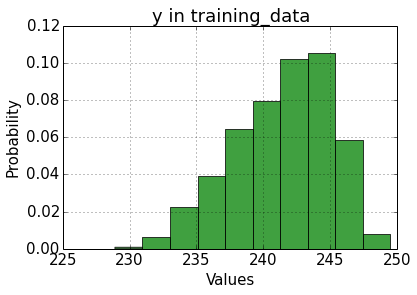

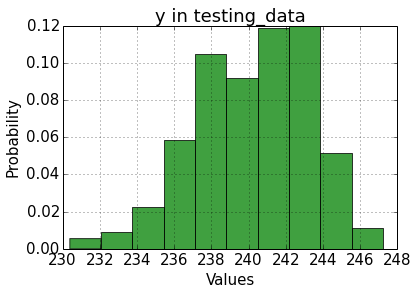

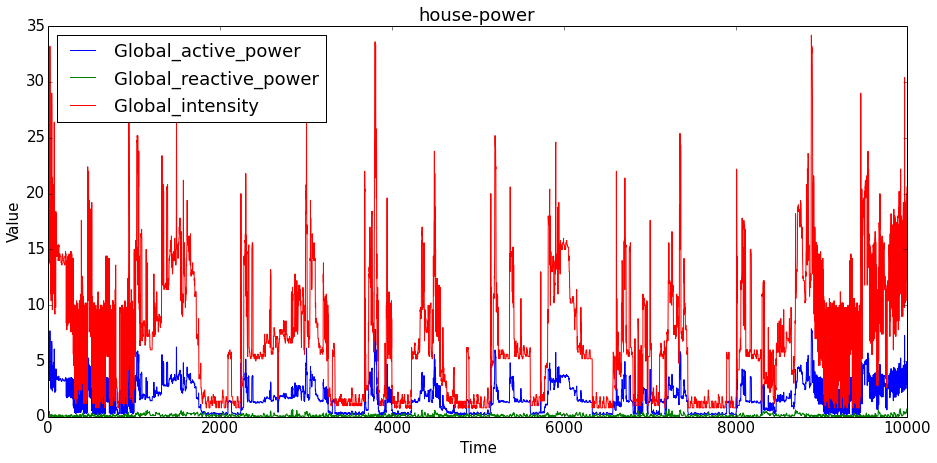

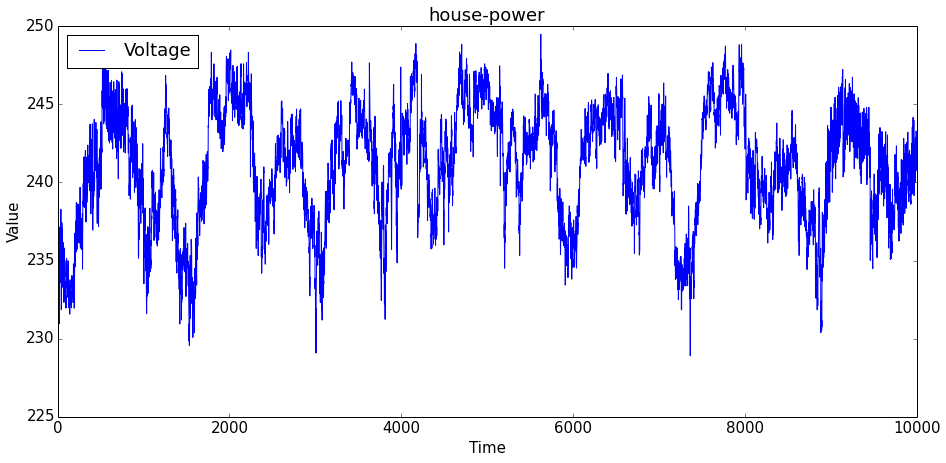

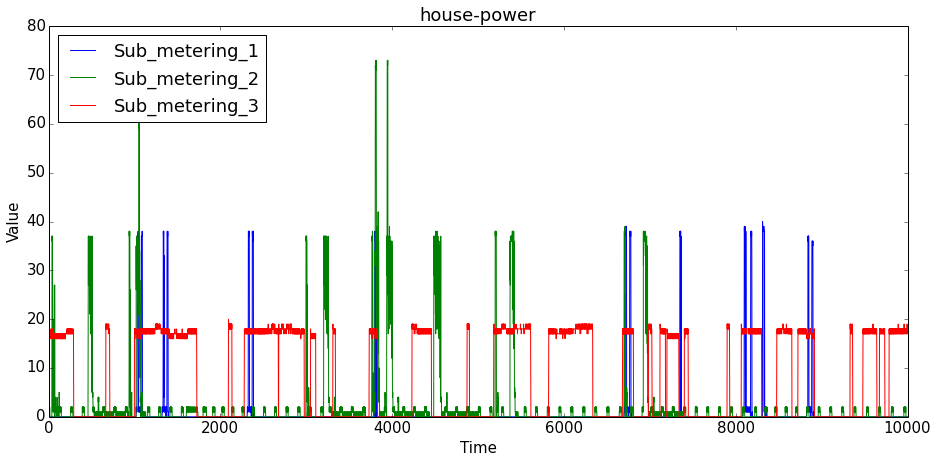

In [3]:
# house-power for machine learning 

# Date;Time;Global_active_power;Global_reactive_power;
# Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3

para_uni_variate = True
para_train_test_split = False
para_win_size = 200

para_train_range = (0,8500)
para_test_range  = (8500,9999)

addr = "../dataset/dataset_ts/house-power.csv"
dta_df = pd.read_csv( addr ,sep=';')
print 'Shape of the dataset: ', dta_df.shape

#----- clean ----- 

dta_df.drop( dta_df[ dta_df['Global_active_power'] == '?' ].index, inplace=True )
dta_df = dta_df.dropna(axis=0)

print dta_df.shape
# ----------------

# ------ type conversion -----

tmpcol = [ 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',\
          'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3' ]

for i in tmpcol:
    dta_df[i] = dta_df[i].astype(float)

# ----------------------------


x_train, x_test, y_train, y_test = \
build_training_testing_data_4learning( dta_df, 'Voltage', ['Global_active_power','Sub_metering_1'], \
                                para_uni_variate, para_train_test_split, para_win_size, \
                             para_train_range, para_test_range )

print 'Shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train),\
    np.shape(x_test), np.shape(y_test)


# visualization
y_distribution_plot( y_train, 'y in training_data' )
y_distribution_plot( y_test,  'y in testing_data' )

# tmpdf = dta_df.drop(['Date', 'Time', 'Voltage'], axis=1)
# multivariate_ts_plot( tmpdf, 'house-power' )

multivariate_ts_plot( dta_df[ ['Global_active_power', 'Global_reactive_power',\
                               'Global_intensity'] ],\
                     'house-power' )

multivariate_ts_plot( dta_df[ ['Voltage'] ], 'house-power' )

multivariate_ts_plot( dta_df[ ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'] ], \
                     'house-power' )

In [4]:
# house power
# fix the training and testing datasets by materialization

x_train.dump("../dataset/dataset_ts/power_xtrain.dat")
y_train.dump("../dataset/dataset_ts/power_ytrain.dat")
x_test.dump("../dataset/dataset_ts/power_xtest.dat")
y_test.dump("../dataset/dataset_ts/power_ytest.dat")


# np.savetxt("../dataset/dataset_ts/power_xtrain.csv", x_train, delimiter=",")
# np.savetxt("../dataset/dataset_ts/power_xtest.csv", x_test, delimiter=",")
# np.savetxt("../dataset/dataset_ts/power_ytrain.csv", y_train, delimiter=",")
# np.savetxt("../dataset/dataset_ts/power_ytest.csv", y_test, delimiter=",")

In [58]:
# API data 

# Documentation https://code.google.com/p/yahoo-finance-managed/wiki/csvHistQuotesDownload
# updated for python 3.5
# Months are 0..11

# import http.client

from yahoo_finance import Share
yahoo = Share('YHOO')
print yahoo.get_open()
print yahoo.get_price()
print yahoo.get_trade_datetime()


# def fetchYahoo(symbol, begYear, begMonth, begDay,  endYear, endMonth, endDay):
#     uri = "/table.csv?s=" + symbol + "&d=" + str(endMonth) + "&e=" + str(endDay) + "&f=" + str(endYear) + "&g=d&a=" + str(begMonth) + "&b=" + str(begDay) + "&c=" + str(begYear) + "&ignore=.csv"
#     print ("uri=",  uri)
#     conn = http.client.HTTPConnection("ichart.finance.yahoo.com")
#     conn.request("GET", uri)
#     r1 = conn.getresponse()
#     data1 = r1.read()
#     print (data1)
#     fname = "data/" + symbol + ".csv"

#     tarr = data1.decode().strip().split("\n")
#     head = tarr[0]
#     body = tarr[1:]
#     body.reverse()
#     body.insert(0,head)
#     f = open(fname, "w")
#     f.write("\n".join(body))
#     f.close()
#     return data1
#   symbol begin     End
# fetchYahoo("SPY",  2010,0,1, 2017,2,10)
# fetchYahoo("SLV",  2007,0,1, 2017,2,10)
# fetchYahoo("GLD",  2005,0,1, 2017,2,10)
# fetchYahoo("CAT",   2004,0,1, 2017,2,10)
# fetchYahoo("IBM",  2005,0,1, 2017,2,10)

48.68
49.63
2017-05-18 20:00:00 UTC+0000
